import libraries and set up for plotting

In [2]:
import numpy as np
import sep

In [3]:
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

open the fits file with astropy and display the image

In [4]:
with fits.open('hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits') as hdul:
    data = hdul[0].data.astype(np.float64)

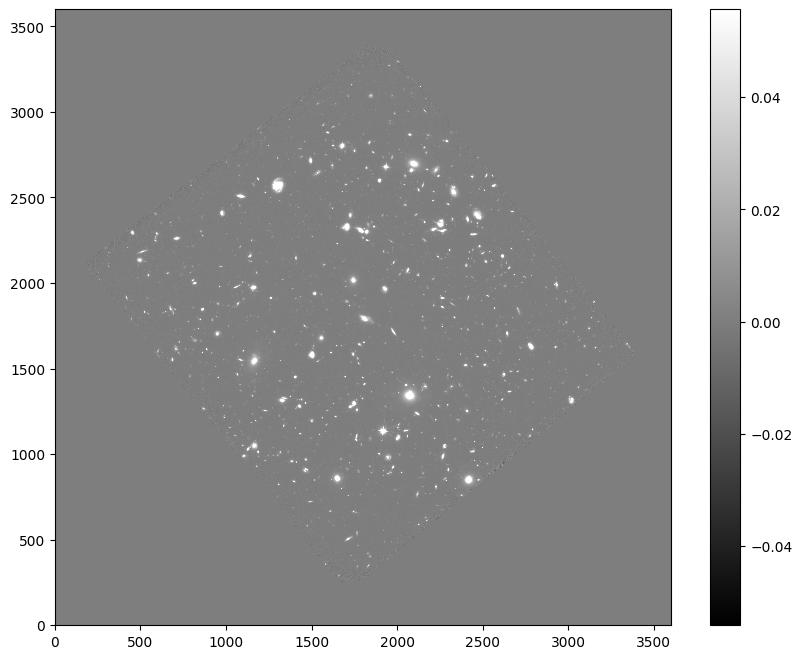

In [19]:
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()
plt.savefig('notebook2_image1.png')

Measure the background

In [6]:
bkg = sep.Background(data)

Display the global background and RMS

In [7]:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


Display the background image

In [8]:
bkg_image = bkg.back()

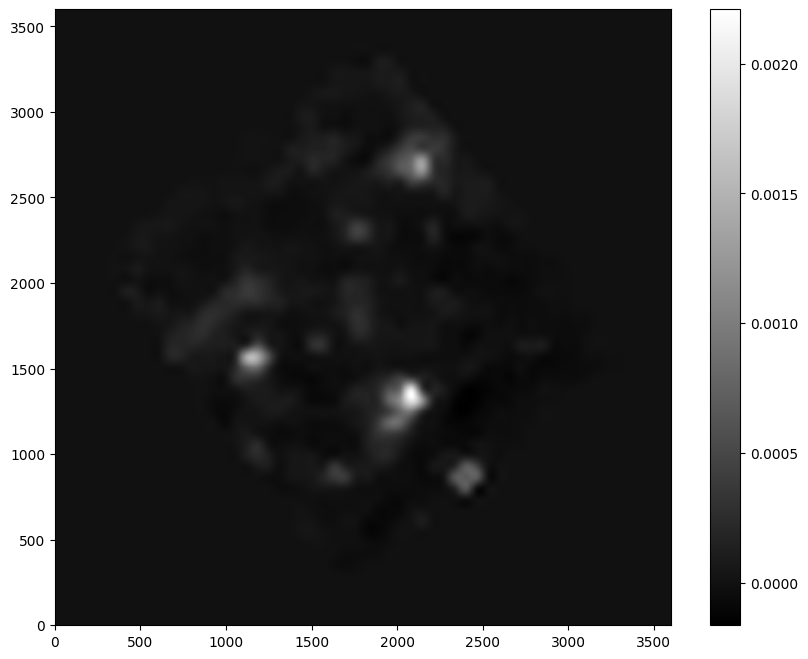

In [20]:
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('notebook2_image2.png')

In [10]:
bkg_rms = bkg.rms()

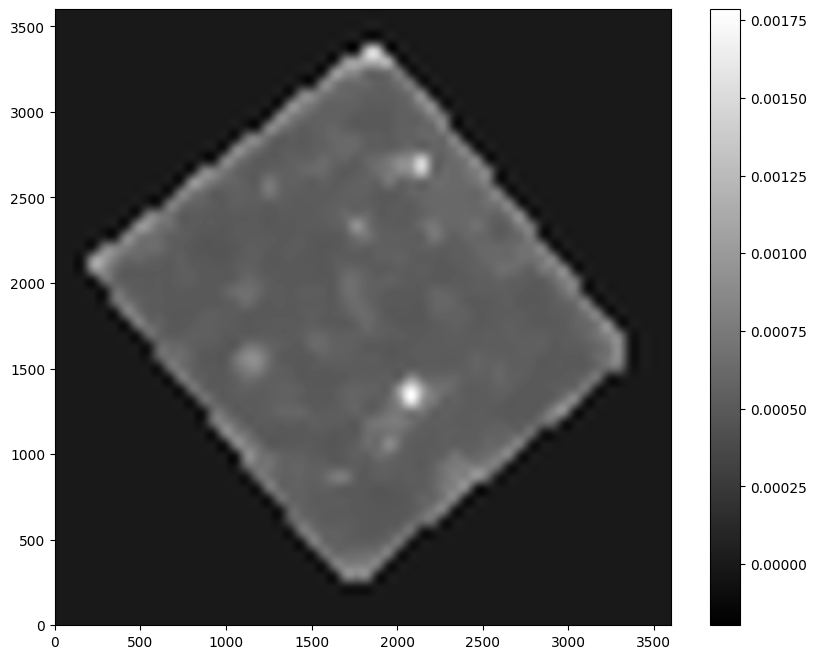

In [23]:
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('notebook2_image3.png')

In [12]:
data_sub = data - bkg

In [13]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

print number of objects detected

In [14]:
len(objects)

8643

Plot the detected objects on the background-subtracted image

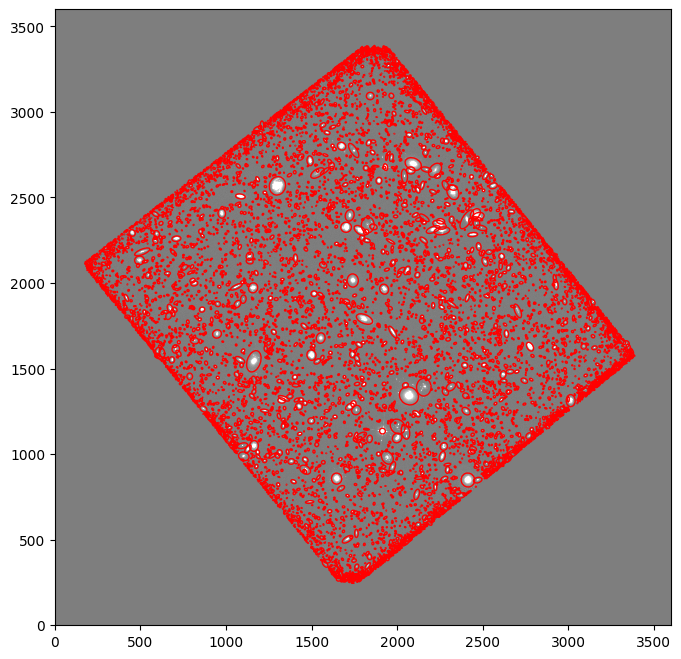

In [22]:
from matplotlib.patches import Ellipse

fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.savefig('notebook2_image4.png')

In [16]:
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [17]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

Display results for the first 10 objects

In [18]:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 0.031282 +/- 0.176890
object 1: flux = 0.031018 +/- 0.176142
object 2: flux = -0.024388 +/- 0.002883
object 3: flux = 0.001947 +/- 0.044219
object 4: flux = 0.012457 +/- 0.111649
object 5: flux = -0.011228 +/- 0.002875
object 6: flux = 0.029368 +/- 0.171394
object 7: flux = -0.009126 +/- 0.002875
object 8: flux = 0.048023 +/- 0.219161
object 9: flux = 0.027840 +/- 0.166877


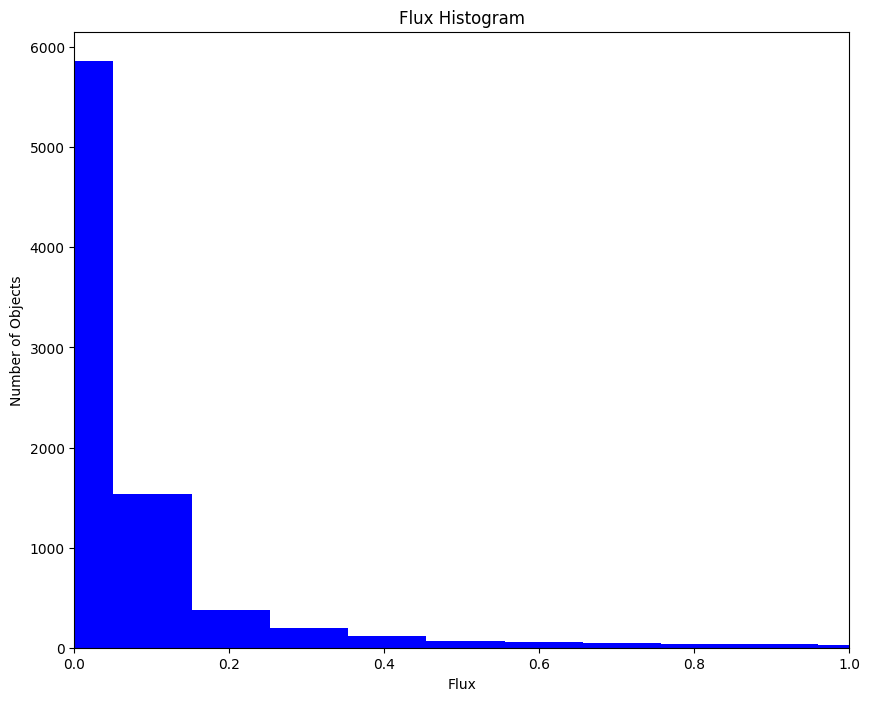

In [68]:
plt.hist(flux, bins=8000, color='blue')
plt.xlim(0, 1)
plt.xlabel('Flux')
plt.ylabel('Number of Objects')
plt.title('Flux Histogram')
plt.savefig('notebook2_histogram.png')
plt.show()

In [61]:
mean_flux = np.mean(flux)
median_flux = np.median(flux)
std_flux = np.std(flux)

print(f"Mean flux: {mean_flux:.2f}")
print(f"Median flux: {median_flux:.2f}")
print(f"Standard deviation of flux: {std_flux:.2f}")

Mean flux: 0.36
Median flux: 0.03
Standard deviation of flux: 9.24


In [64]:
max_flux = np.max(flux)
stds_away = (max_flux - mean_flux) / std_flux

print(f"Largest outlier flux: {max_flux:.2f}")
print(f"Outlier is {stds_away:.2f} standard deviations away from the mean")

Largest outlier flux: 807.30
Outlier is 87.31 standard deviations away from the mean


[W 2024-12-10 06:13:49,247.247 matplotlib.image] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


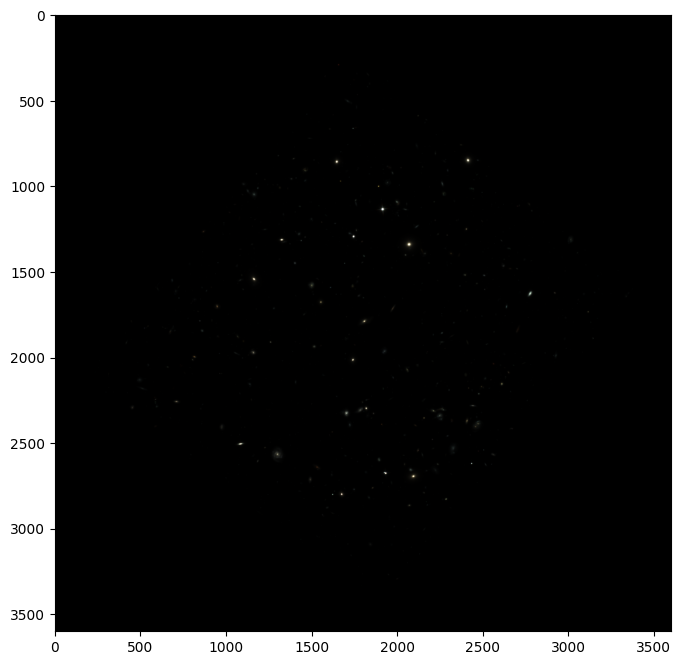

In [75]:
with fits.open('hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits') as hdul_160:
    f160w = hdul_160[0].data.astype(np.float64)  # Ensure float for normalization

with fits.open('hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits') as hdul_125:
    f125w = hdul_125[0].data.astype(np.float64)

with fits.open('hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits') as hdul_105:
    f105w = hdul_105[0].data.astype(np.float64)

rgb_image = np.zeros((f160w.shape[0], f160w.shape[1], 3))
rgb_image[..., 0] = f160w
rgb_image[..., 1] = f125w
rgb_image[..., 2] = f105w

plt.imshow(rgb_image)
plt.savefig('notebook2_3color.png')
plt.show()